In [1]:
# <img src="https://acart.com/wp-content/uploads/2017/04/faceplus-example.png" alt="Facial Recognition And Emotion Detection Model" style="width:100%;height:400px;">

In [2]:
!pip install seaborn

In [3]:
import numpy as npy # linear algebra
import pandas as pds # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator as ImgDataGen

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
import os, sys, time, warnings, sklearn
ROOT='/kaggle/input'
# ROOT='data'
# for dirname, _, filenames in os.walk(ROOT):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [5]:
TRAIN_PATH=ROOT+'/fer2013/train'
TEST_PATH=ROOT+'/fer2013/test'
train_angry_img_path=TRAIN_PATH +'/angry'

OVERSAMPLED_TRAIN_PATH='../fed_oversampled_train'
MODEL_PATH='models'
IMAGE_PATH='images'

# Model Architecture path
def model_arch(model_name):
    !mkdir images
    arch=IMAGE_PATH+'/fer-2013_'+model_name+'.png'
    return arch

#  TensorFlow Checkpoint save_weight uses .ckpt extension format
def checkpoint_path(model_name):
    checkpoint_path = MODEL_PATH+"/fedav_best_model-"+model_name+".ckpt"
    return checkpoint_path

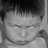

In [6]:
# Load a sample image 
# using open() to open images
image_data = Image.open(train_angry_img_path+'/Training_10118481.jpg')
image_data

Image shape: (48, 48)
Image data array: [[ 50  32  15 ... 133 151  86]
 [ 57  34  22 ... 138 151  89]
 [ 61  30  24 ... 142 149  89]
 ...
 [103 100 100 ... 149 104  85]
 [107 111 113 ... 151 120  86]
 [104 104 112 ... 143 136  83]]
Image array shape: (48, 48)


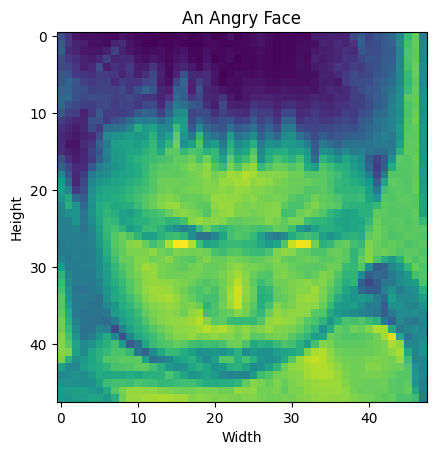

In [7]:
# Get the shape of the image
image=plt.imread(train_angry_img_path+'/Training_10118481.jpg')
print(f'Image shape: {image.shape}')

# Convert image data (like jpeg) to numpy using asarray()
image_array = npy.asarray(image_data)
print(f'Image data array: {image_array}')

# Get the shape of the image array
print(f'Image array shape: {image_array.shape}')

# Printing the image 
plt.imshow(image_array)
plt.xlabel('Width')
plt.ylabel('Height')
plt.title('An Angry Face')
plt.show()

In [8]:
# Get the list of folders in the directory as classes
class_dir=os.listdir(TRAIN_PATH+'/')
class_dir

['surprise', 'fear', 'angry', 'neutral', 'sad', 'disgust', 'happy']

 For Statistical Analysis, we'll load the images, convert them to numpy arrays, and store them in a pandas dataframe with the columns 'filename', 'image', and 'label'

In [9]:
# set up file paths and labels
folder_names = class_dir
label_dict = {folder_names[i]:i for i in range(len(folder_names))}
image_filenames = []
labels = []

# iterate through each folder and collect filenames and labels
for folder_name in folder_names:
    folder_path = os.path.join(TRAIN_PATH, folder_name)
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg'):
            image_filenames.append(os.path.join(folder_name, filename))
            labels.append(label_dict[folder_name])

# create pandas dataframe
df = pds.DataFrame({'filename': image_filenames, 'emotion': labels})

# add 'image' column to dataframe
image_array_list = []
for filename in df['filename']:
    img_path = os.path.join(TRAIN_PATH, filename)
    img = Image.open(img_path)
    img_array = npy.array(img).flatten()
    image_array_list.append(img_array)
df['image'] = image_array_list

dfcopy = df.copy()

# strip and replace commas in 'image' column
# df['image'] = df['image'].apply(lambda x: x.strip('[]').replace(',', ' '))

# convert the image column to a string with comma-separated values
df['image'] = df['image'].apply(lambda x: ' '.join(map(str, x.tolist())))

# remove square brackets from the string representation of the array
df['image'] = df['image'].str.replace('[', '').str.replace(']', '')


# Export the preprocessed file to CSV
!mkdir output
df.to_csv('output/fer-2013-images_preprocessed.csv', index=False)

# display dataframe
cm = sns.light_palette("green", as_cmap=True)
df.tail(10).style.background_gradient(cmap=cm, text_color_threshold = 0.1).format(precision=2).highlight_null('red').set_properties(**{'background-color': '#256d7c;', 'color': 'white'}, subset=['filename'])
df

/tmp/ipykernel_35/3618930341.py:36: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['image'] = df['image'].str.replace('[', '').str.replace(']', '')


filename  emotion  \
0      surprise/Training_66056468.jpg        0   
1      surprise/Training_26522394.jpg        0   
2      surprise/Training_63239185.jpg        0   
3      surprise/Training_67725241.jpg        0   
4      surprise/Training_71308969.jpg        0   
...                               ...      ...   
28704     happy/Training_18866880.jpg        6   
28705     happy/Training_16513509.jpg        6   
28706     happy/Training_10834907.jpg        6   
28707     happy/Training_30459679.jpg        6   
28708     happy/Training_95673040.jpg        6   

                                                   image  
0      38 44 66 67 74 76 47 38 45 39 38 31 37 49 70 6...  
1      9 17 67 93 103 144 191 208 215 218 209 191 178...  
2      254 255 255 254 254 255 249 255 163 3 5 5 0 0 ...  
3      255 253 254 207 125 120 38 33 18 39 31 22 21 2...  
4      141 155 165 185 193 191 203 207 200 202 202 21...  
...                                                  ...  
28704  164 165 173 176 178 182 185 186 188 200 142 36...  
28705  129 133 133 134 131 135 138 124 111 117 111 11...  
28706  106 106 109 114 74 18 6 1 3 2 2 7 9 14 17 57 1...  
28707  7 5 7 7 5 4 5 5 6 4 21 20 6 1 9 30 46 35 24 22...  
28708  164 171 141 159 193 212 184 167 148 110 109 13...  

[28709 rows x 3 columns]

In [10]:
df.emotion.value_counts().unique()

array([7215, 4965, 4830, 4097, 3995, 3171,  436])

In [11]:
dfcopy

filename  emotion  \
0      surprise/Training_66056468.jpg        0   
1      surprise/Training_26522394.jpg        0   
2      surprise/Training_63239185.jpg        0   
3      surprise/Training_67725241.jpg        0   
4      surprise/Training_71308969.jpg        0   
...                               ...      ...   
28704     happy/Training_18866880.jpg        6   
28705     happy/Training_16513509.jpg        6   
28706     happy/Training_10834907.jpg        6   
28707     happy/Training_30459679.jpg        6   
28708     happy/Training_95673040.jpg        6   

                                                   image  
0      [38, 44, 66, 67, 74, 76, 47, 38, 45, 39, 38, 3...  
1      [9, 17, 67, 93, 103, 144, 191, 208, 215, 218, ...  
2      [254, 255, 255, 254, 254, 255, 249, 255, 163, ...  
3      [255, 253, 254, 207, 125, 120, 38, 33, 18, 39,...  
4      [141, 155, 165, 185, 193, 191, 203, 207, 200, ...  
...                                                  ...  
28704  [164, 165, 173, 176, 178, 182, 185, 186, 188, ...  
28705  [129, 133, 133, 134, 131, 135, 138, 124, 111, ...  
28706  [106, 106, 109, 114, 74, 18, 6, 1, 3, 2, 2, 7,...  
28707  [7, 5, 7, 7, 5, 4, 5, 5, 6, 4, 21, 20, 6, 1, 9...  
28708  [164, 171, 141, 159, 193, 212, 184, 167, 148, ...  

[28709 rows x 3 columns]

In [12]:
# dfcopy = df.copy()
dfcopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28709 entries, 0 to 28708
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  28709 non-null  object
 1   emotion   28709 non-null  int64 
 2   image     28709 non-null  object
dtypes: int64(1), object(2)
memory usage: 673.0+ KB


In [13]:
# Computing the mean and standard deviation of the pixel values in each image
mean_values = [npy.mean(img) for img in dfcopy['image']]
std_values = [npy.std(img) for img in dfcopy['image']]

# add new columns for mean and standard deviation
dfcopy['pixel_mean'] = mean_values
dfcopy['pixel_std'] = std_values

dfcopy= dfcopy[['filename', 'image', 'pixel_mean', 'pixel_std', 'emotion']]
# print statistical summary
dfcopy.tail(10).style.background_gradient(cmap=cm, text_color_threshold = 0.1).format(precision=2).highlight_null('red').set_properties(**{'background-color': '#256d7c;', 'color': 'white'}, subset=['filename', 'image'])

In [14]:
dfcopy.describe().style.background_gradient(cmap=cm, text_color_threshold = 0.1).format(precision=2).highlight_null('red').set_properties(**{'background-color': '#256d7c;', 'color': 'white'}, subset=['emotion'])


In [15]:
# Get dictionary list of image count per class
def class_sample(type):
    if type.lower() == 'test' or type.lower() == 'train':
        path=''
        if type.lower() == 'train':    
            path= TRAIN_PATH
        else:
            path= TEST_PATH
        
        filepath=path+'/'
        class_count = []
        class_dict ={}
        for folder in os.listdir(filepath) :
              class_count.append(len(os.listdir(filepath+folder)))
              class_dict[folder]=len(os.listdir(filepath+folder))
        class_total = sum(class_count)
        return class_total, class_count, class_dict
    else:
        raise ValueError('Invalid type. Must be "test" or "train".')


def test_train_distribution():
      print("---- Train Set ----")
      avg_train=class_sample('train')[0]/len(class_sample('train')[1])
      print(f'Train class distribution:\n{class_sample("train")[2]}')
      print("Average train class: ",round(avg_train))    
      print('Total train: ', class_sample('train')[0])

      print("\n---- Test Set ----")
      avg_test=class_sample('test')[0]/len(class_sample('test')[1])
      print(f'Test class distribution:\n{class_sample("test")[2]}')
      print("Average test class: ",round(avg_test)) 
      print('Total test: ', class_sample('test')[0])


test_train_distribution()

# test_samples=class_sample('test')[0]
# test_batch_size=sorted([int(test_samples/n) for n in range(1,test_samples+1) if test_samples % n ==0 and test_samples/n<=80],reverse=True)[0]  


---- Train Set ----
Train class distribution:
{'surprise': 3171, 'fear': 4097, 'angry': 3995, 'neutral': 4965, 'sad': 4830, 'disgust': 436, 'happy': 7215}
Average train class:  4101
Total train:  28709

---- Test Set ----
Test class distribution:
{'surprise': 831, 'fear': 1024, 'angry': 958, 'neutral': 1233, 'sad': 1247, 'disgust': 111, 'happy': 1774}
Average test class:  1025
Total test:  7178


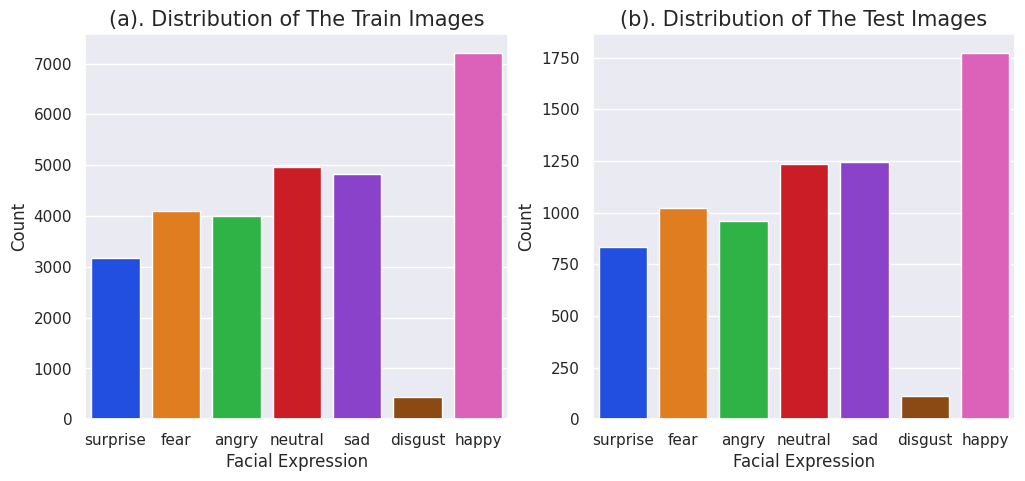

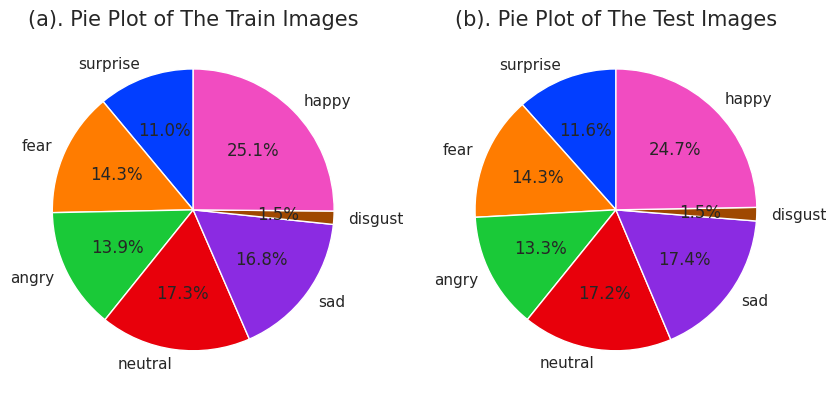

In [16]:
df_train = pds.DataFrame(list(class_sample("train")[2].items()), columns=['Emotion', 'Count'])
df_train.index.name = 'Emotion'
df_test = pds.DataFrame(list(class_sample("test")[2].items()), columns=['Emotion', 'Count'])
df_test.index.name = 'Emotion'


# plot a barplot with vertical orientation
sns.set()
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
axis = sns.barplot(x='Emotion', y='Count', data=df_train, orient='v', palette='bright')
# set labels and title
plt.xlabel("Facial Expression", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("(a). Distribution of The Train Images", fontsize=15)
# plt.legend( df_train.Emotion, loc='upper left')
# set x-axis tick labels
# axis.set_xticks(range(len(df_train.Emotion)), df_train.Emotion)
# axis.yaxis.set_major_locator(ticker.MultipleLocator(2.5))

plt.subplot(1, 2, 2)
sns.barplot(x='Emotion', y='Count', data=df_test, orient='v', palette='bright')
plt.xlabel("Facial Expression", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("(b). Distribution of The Test Images", fontsize=15)
plt.show()

print('\n\n')

x_train = npy.array([ len(os.listdir(TRAIN_PATH+'/'+class_name+'/')) for class_name in class_dir])
x_test = npy.array([ len(os.listdir(TEST_PATH+'/'+class_name+'/')) for class_name in class_dir])
label = class_dir
  
# plot a Pie plot with vertical orientation
plt.figure(figsize=(10, 5))
ax = plt.subplot(1, 2, 1)
# define Seaborn color palette to use
palette_color = sns.color_palette('bright')
plt.pie(x_train, labels=label, colors=palette_color, autopct='%1.1f%%', startangle=90)
ax.set_title('(a). Pie Plot of The Train Images', fontsize=15)

ay = plt.subplot(1, 2, 2)
plt.pie(x_test, labels=label, colors=palette_color, autopct='%1.1f%%', startangle=90)
ay.set_title('(b). Pie Plot of The Test Images', fontsize=15)
plt.show()



<div>
    <h2 style = "padding: 3px; 
                 color: #256d7c;
                 font-size: 30px;
                 font-family: Cambria;
                 font-weight: bold;">Oversampling
    </h2>
</div>

In [17]:
# Oversampling Technique
import os
from PIL import Image

# Define the paths to the original and oversampled dataset
train_dir = TRAIN_PATH
oversampled_dir = OVERSAMPLED_TRAIN_PATH

target_length = 7215 # Using the highest count 
# target_length = 4101 # Using the average 

if not os.path.exists(oversampled_dir):
    os.mkdir(oversampled_dir)

for subfolder in os.listdir(train_dir):
    subfolder_path = os.path.join(train_dir, subfolder)
    if os.path.isdir(subfolder_path):
        num_images = len(os.listdir(subfolder_path))
        num_duplicates = target_length // num_images
        remainder = target_length % num_images

        for i in range(num_duplicates):
            for image_file in os.listdir(subfolder_path):
                image_path = os.path.join(subfolder_path, image_file)
                image = Image.open(image_path)
                new_image_file = f"{i}_{image_file}"
                new_image_path = os.path.join(oversampled_dir, subfolder, new_image_file)
                if not os.path.exists(os.path.join(oversampled_dir, subfolder)):
                    os.mkdir(os.path.join(oversampled_dir, subfolder))
                image.save(new_image_path)

        if remainder != 0:
            for image_file in os.listdir(subfolder_path)[:remainder]:
                image_path = os.path.join(subfolder_path, image_file)
                image = Image.open(image_path)
                new_image_file = f"{num_duplicates}_{image_file}"
                new_image_path = os.path.join(oversampled_dir, subfolder, new_image_file)
                if not os.path.exists(os.path.join(oversampled_dir, subfolder)):
                    os.mkdir(os.path.join(oversampled_dir, subfolder))
                image.save(new_image_path)


In [18]:
# Get dictionary list of image count per class
def over_class_sample():
        filepath=OVERSAMPLED_TRAIN_PATH+'/'
        class_count = []
        class_dict ={}
        for folder in os.listdir(filepath) :
              class_count.append(len(os.listdir(filepath+folder)))
              class_dict[folder]=len(os.listdir(filepath+folder))
        class_total = sum(class_count)
        return class_total, class_count, class_dict
 

# test_samples=class_sample('test')[0]
# test_batch_size=sorted([int(test_samples/n) for n in range(1,test_samples+1) if test_samples % n ==0 and test_samples/n<=80],reverse=True)[0]  


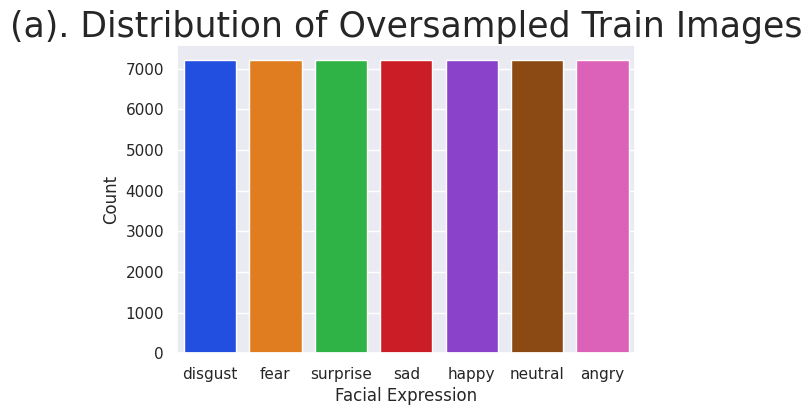


---- Oversampled Train Set ----
Train class distribution:
{'disgust': 7215, 'fear': 7215, 'surprise': 7215, 'sad': 7215, 'happy': 7215, 'neutral': 7215, 'angry': 7215}
Average train class:  7215
Total train:  50505


In [19]:
df_overtrain = pds.DataFrame(list(over_class_sample()[2].items()), columns=['Emotion', 'Count'])
df_overtrain.index.name = 'Emotion'


# plot a barplot with vertical orientation
sns.set()
plt.figure(figsize=(13, 4))
plt.subplot(1, 2, 1)
axis = sns.barplot(x='Emotion', y='Count', data=df_overtrain, orient='v', palette='bright')
# set labels and title
plt.xlabel("Facial Expression", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("(a). Distribution of Oversampled Train Images", fontsize=25)
plt.show()



def test_train_distribution():
      print("\n---- Oversampled Train Set ----")
      avg_train=over_class_sample()[0]/len(over_class_sample()[1])
      print(f'Train class distribution:\n{over_class_sample()[2]}')
      print("Average train class: ",round(avg_train))    
      print('Total train: ', over_class_sample()[0])



test_train_distribution()


<div>
    <h2 style = "padding: 3px; 
                 color: #256d7c;
                 font-size: 30px;
                 font-family: Cambria;
                 font-weight: bold;">Data Augmentation
    </h2>
</div>

In [20]:
#Definnig a function to do so 
def grayscale_RGB_and_upsizing(image,size=[224,224]):
    # image = tf.image.grayscale_to_rgb(tf.convert_to_tensor(image))
    image = tf.image.resize(tf.convert_to_tensor(image), size)
    return image

In [21]:
target_size=(48, 48)
# target_size=(224, 224)
batch_size=32

## Train Image Data Generator instance. 
# We will not apply any transformon specific orientations or features and no initial rescale to the image
# We'll only split the image data into train and validation set
trainValidation_data_generator = ImgDataGen(
                                            # rescale=1./225,
                                            rotation_range=10,  # Randomly rotate images by up to 10 degrees
                                            zoom_range=0.2,  # Randomly zoom images by up to 20%
                                            width_shift_range=0.1,  # Randomly shift images horizontally by up to 10% of the image width
                                            height_shift_range=0.1,  # Randomly shift images vertically by up to 10% of the image height
                                            shear_range=0.2,  # Randomly apply shearing transformations
                                            horizontal_flip=True,  # Randomly flip images horizontally
                                            fill_mode='nearest',  # Fill in missing pixels with the nearest value
                                            # preprocessing_function=grayscale_RGB_and_upsizing,
                                            validation_split=0.2    # set the validation split                                
                                            )

# Test Image Data Generator instance for Test data
validation_data_generator = ImgDataGen(
                                    validation_split=0.14,
                                    )

# Test Image Data Generator instance for Test data
test_data_generator = ImgDataGen(
                                # rescale = 1./255,
                                )

# Set a random seed to synchronize the shuffle order across different runs of the generator
# trainValidation_data_generator.set_seed(42)


In [22]:
# Successfully mapped the train-images to their classes from the dataframe. Now let's do the same for the test-images. 
# Here, I will only be rescaling. No other transformations are applies, to preserve originality of the images.

classes = ['angry', 'neutral', 'surprise', 'sad', 'disgust', 'fear', 'happy']

## Mapping images to their classes.
print('Train Set Generated - ',end=' ') 
train_generator = trainValidation_data_generator.flow_from_directory(
                                                            directory=OVERSAMPLED_TRAIN_PATH, 
                                                            # directory=TRAIN_PATH, 
                                                            target_size=target_size,
                                                            batch_size=batch_size,
                                                            class_mode='categorical', 
                                                            color_mode='rgb', 
                                                            classes=classes,
                                                            shuffle=True, 
                                                            subset='training' # set as training data
                                                        )
## Mapping images to their classes.
print('Validation Set Generated - ',end=' ') 
validation_generator = trainValidation_data_generator.flow_from_directory(
                                                            # directory=TRAIN_PATH, 
                                                            directory=OVERSAMPLED_TRAIN_PATH, 
                                                            target_size=target_size,
                                                            batch_size=batch_size,
                                                            class_mode='categorical', 
                                                            color_mode='rgb', 
                                                            classes= classes,
                                                            shuffle=False, 
                                                            subset='validation' # set as validation data
                                                        )
test_samples=class_sample('test')[0]
test_batch_size=batch_size
test_steps=int(test_samples/test_batch_size)

## Mapping images to their classes.
print('Test Set Generated - ',end=' ') 
test_generator = test_data_generator.flow_from_directory(
                                        directory=TEST_PATH, 
                                        target_size=target_size,
                                        class_mode='categorical', 
                                        color_mode='rgb', 
                                        classes=classes,
                                        shuffle=False, 
                                        batch_size=test_batch_size
                                        )

## Mapping shuffled images to their classes.
print('Shuffled Test Set Generated - ',end=' ') 
test_generator_shuffled = test_data_generator.flow_from_directory(
                                        TEST_PATH, 
                                        target_size=target_size,
                                        class_mode='categorical', 
                                        color_mode='rgb', 
                                        classes=classes,
                                        shuffle=True, 
                                        batch_size=test_batch_size
                                        )

test_samples=class_sample('test')[0]
test_batch_size=batch_size
test_steps=int(test_samples/test_batch_size)

Train Set Generated -  Found 40404 images belonging to 7 classes.
Validation Set Generated -  Found 10101 images belonging to 7 classes.
Test Set Generated -  Found 7178 images belonging to 7 classes.
Shuffled Test Set Generated -  Found 7178 images belonging to 7 classes.


In [23]:
# From the generator we can get information we will need later
# classes=  # os.listdir(TRAIN_PATH+'/')
class_dictionary = train_generator.class_indices
class_keys = list(train_generator.class_indices.keys())
class_values = list(train_generator.class_indices.values())
class_count = len(class_keys)

print ('test batch size: ' ,test_batch_size, '  test steps: ', test_steps, ' number of classes : ', class_count)

train_images, train_labels = next(train_generator)
validation_images, validation_labels = next(validation_generator)
test_images, test_labels = next(test_generator)

print(f'\nThere are 7 classes: {classes}')
print(f'The class dictionary are: {class_dictionary}')
print('Class count: ', class_count)

print('\nX_train shape: ', train_images.shape)
print('y_train shape: ', train_labels.shape)
print('\nX_test shape: ', test_images.shape)
print('y_test shape: ', test_labels.shape)

print('\ntrain_generator sample: ', train_generator.samples)
print('validation_generator sample: ', validation_generator.samples)
print('test_generator sample: ', test_generator.samples)

print('\ntrain_generator sample: ', train_generator.labels)
print('validation_generator sample: ', validation_generator.labels)
print('test_generator sample: ', test_generator.labels)


test batch size:  32   test steps:  224  number of classes :  7

There are 7 classes: ['angry', 'neutral', 'surprise', 'sad', 'disgust', 'fear', 'happy']
The class dictionary are: {'angry': 0, 'neutral': 1, 'surprise': 2, 'sad': 3, 'disgust': 4, 'fear': 5, 'happy': 6}
Class count:  7

X_train shape:  (32, 48, 48, 3)
y_train shape:  (32, 7)

X_test shape:  (32, 48, 48, 3)
y_test shape:  (32, 7)

train_generator sample:  40404
validation_generator sample:  10101
test_generator sample:  7178

train_generator sample:  [0 0 0 ... 6 6 6]
validation_generator sample:  [0 0 0 ... 6 6 6]
test_generator sample:  [0 0 0 ... 6 6 6]


In [24]:
class_indices = train_generator.class_indices
class_counts = {class_name: 0 for class_name in class_indices}
num_images = train_generator.samples

batch_size = train_generator.batch_size
num_batches = len(train_generator)

for i in range(num_batches):
    batch = next(train_generator)
    images, labels = batch
    for j in range(len(labels)):
        label = npy.argmax(labels[j])  # convert one-hot encoding to integer label
        class_name = list(class_indices.keys())[list(class_indices.values()).index(label)]
        class_counts[class_name] += 1

print(class_counts)
print(f"Total number of images in train generator: {num_images}")

{'angry': 5769, 'neutral': 5771, 'surprise': 5767, 'sad': 5775, 'disgust': 5775, 'fear': 5773, 'happy': 5774}
Total number of images in train generator: 40404


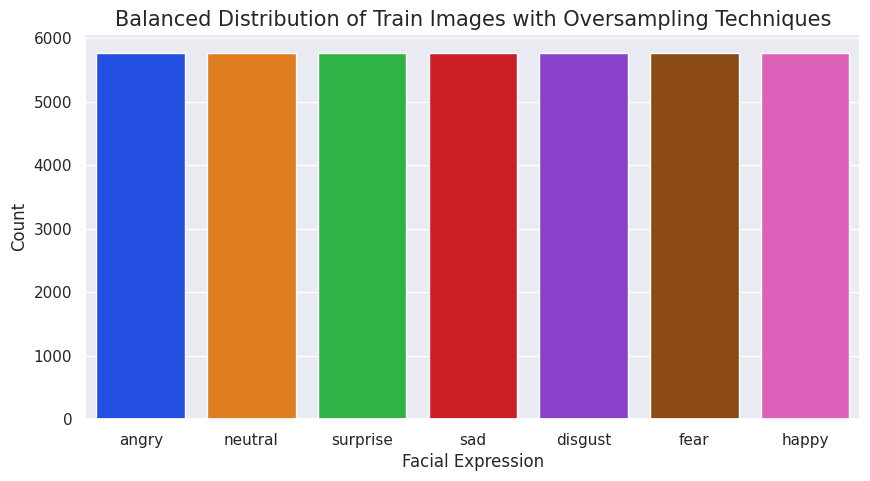

In [25]:
df_train_gen = pds.DataFrame(list(class_counts.items()), columns=['Emotion', 'Count'])
df_train_gen.index.name = 'Emotion'


# plot a barplot with vertical orientation
sns.set()
plt.figure(figsize=(10, 5))
sns.barplot(x='Emotion', y='Count', data=df_train_gen, orient='v', palette='bright')
plt.xlabel("Facial Expression", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Balanced Distribution of Train Images with Oversampling Techniques", fontsize=15)
plt.show()

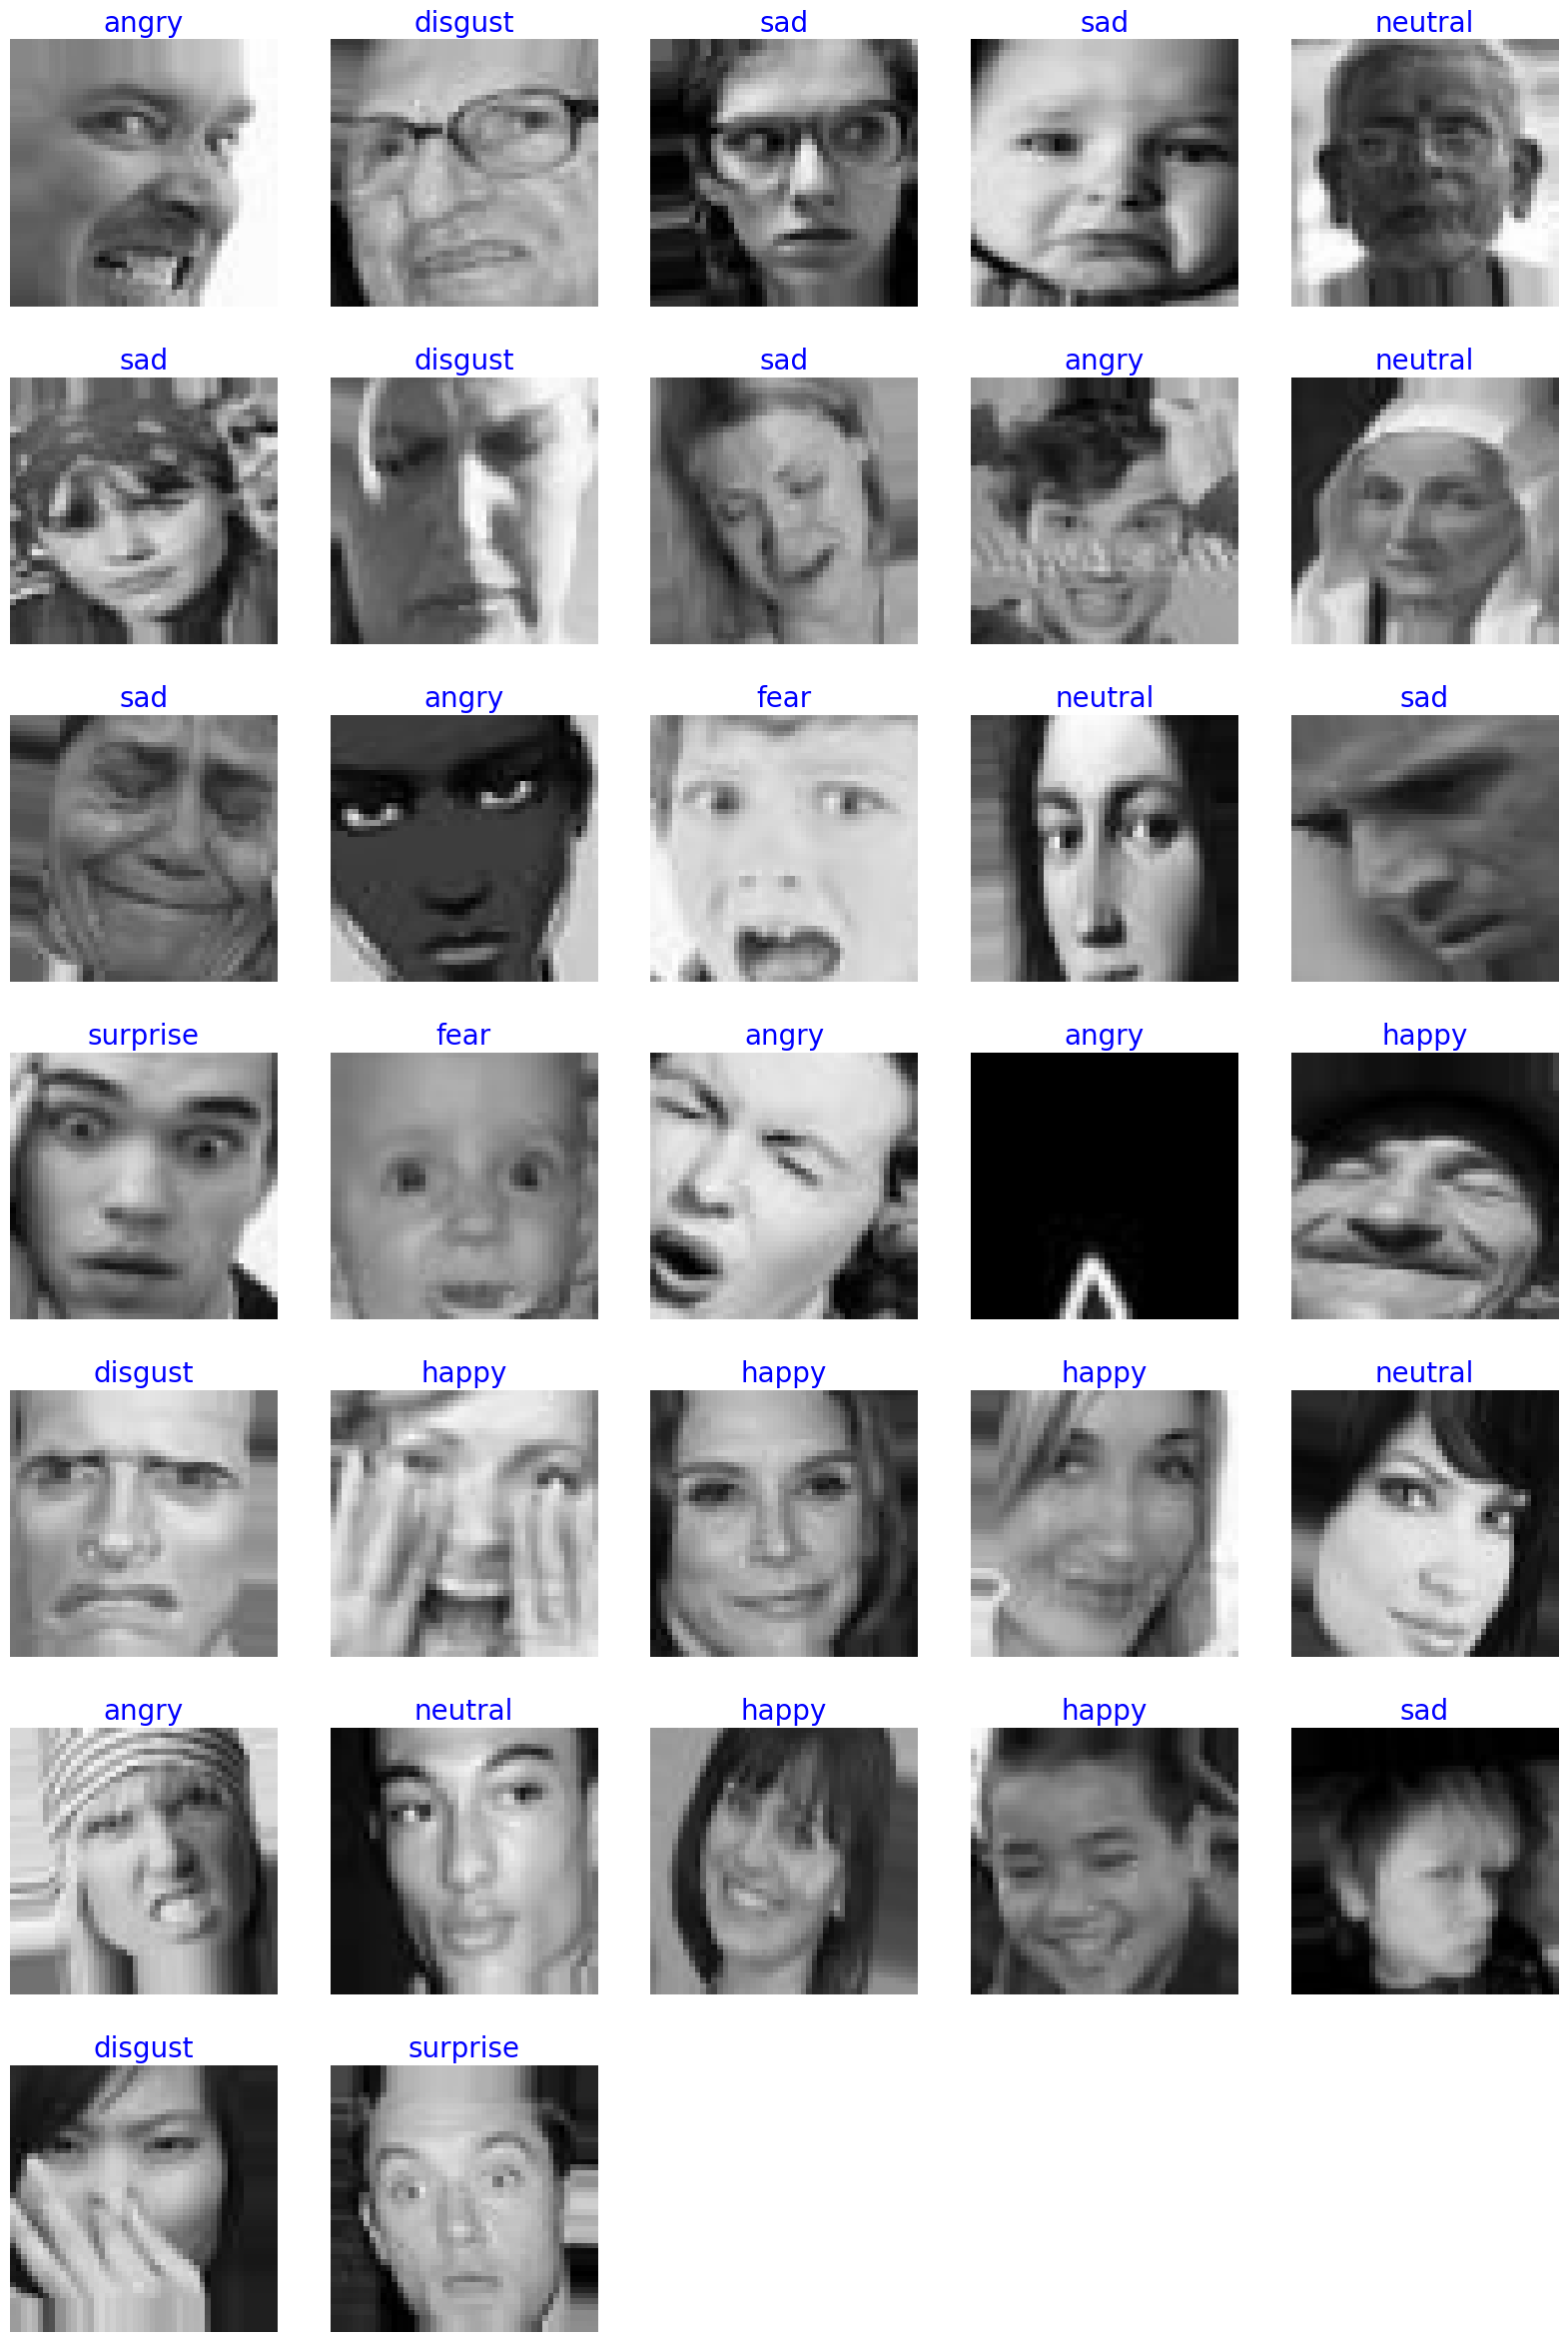

In [26]:
# Get the sample images, labels, and their filenames 
# To get the correct filename, turn off the shuffle
def plotImageWithNames(gen):
    images, labels = next(gen)
    filenames = gen.filenames
    classes = list(gen.class_indices.keys())
    
    plt.figure(figsize=(20, 30))
    length=len(labels)
    if length<32:  
        r=length
    else:
        r=32
    for i in range(r):        
        plt.subplot(7, 5, i + 1)
        image=images[i] /255
        plt.imshow(image)
        index=npy.argmax(labels[i])
        class_name=classes[index]
        filename=gen.filenames[i]
        plt.title(
                    label=f"{class_name}", # \n{filename} ", 
                    color='blue', 
                    fontsize=20
                    )
        plt.axis('off')
    plt.show()

plotImageWithNames(train_generator)

In [27]:
from tensorflow import keras
from sklearn import set_config
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator as ImgDataGen
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D, Activation, BatchNormalization
from tensorflow.keras.models import Sequential, load_model

from tensorflow.keras import layers, optimizers, metrics, regularizers, models
from tensorflow.keras.optimizers import Adam, Adamax
# from tensorflow.keras.metrics import categorical_crossentropy, sparse_categorical_crossentropy


In [28]:
# define the image shape for the input layer
input_shape=(target_size[0], target_size[1], 3)
batch_size = batch_size
epochs=60
ask_epoch=0

In [29]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D

model_name='EfficientNetB3'
base_model=tf.keras.applications.efficientnet.EfficientNetB3(
                                                            include_top=False, 
                                                            weights="imagenet",
                                                            input_shape=input_shape, 
                                                            pooling='max'
                                                            ) 
# from tensorflow.keras.models import Model
# from tensorflow.keras.applications import ResNet50

# model_name = 'ResNet50'
# # input_shape = (224, 224, 3)  # Adjust the input shape according to your requirement

# base_model = ResNet50(
#     include_top=False, 
#     weights="imagenet",
#     input_shape=input_shape, 
#     pooling='max'
# )

# from tensorflow.keras.models import Model
# from tensorflow.keras.applications import VGG16

# model_name = 'VGG16'
# input_shape = (224, 224, 3)  # Adjust the input shape according to your requirement

# base_model = VGG16(
#     include_top=False, 
#     weights="imagenet",
#     input_shape=input_shape, 
#     pooling='max'
# )

# Let's make our base_model trainable to get better results
base_model.trainable=True
x=base_model.output

x=BatchNormalization(
                    axis=-1, 
                    momentum=0.99, 
                    epsilon=0.001,
                    name='batch_norm_x' 
                    )(x)
x = Dense(
          256, 
          kernel_regularizer = regularizers.l2(l = 0.020),
          activity_regularizer=regularizers.l1(0.01),
          bias_regularizer=regularizers.l1(0.01),
          activation='relu',
          name='dense_x'
          )(x)

# x = Dense(
#           256, 
#           kernel_regularizer = regularizers.l2(l = 0.016),
#           activity_regularizer=regularizers.l1(0.006),
#           bias_regularizer=regularizers.l1(0.006),
#           activation='relu',
#           name='dense_x'
#           )(x)

x=Dropout(
          rate=.4, 
          seed=123,
          name='dropout_x'
          )(x) 
      
output=Dense(
            class_count, 
            activation='softmax',
            name='dense_output'
            )(x)
cnn_model=Model(inputs=base_model.input, outputs=output, name=model_name)
learning_rate=.001 # start with this learning rate
cnn_model.compile(
                  Adamax(learning_rate=learning_rate), 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy']
                  )

# View the model summary
cnn_model.summary()

43941136/43941136 [==============================] - 0s 0us/step
Model: "EfficientNetB3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 rescaling (Rescaling)          (None, 48, 48, 3)    0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 48, 48, 3)    7           ['rescaling[0][0]']              
                                                                                                  
 rescaling_1 (Rescaling)        (None, 48, 48, 3)    0           ['normalization[0][0]']          
                    

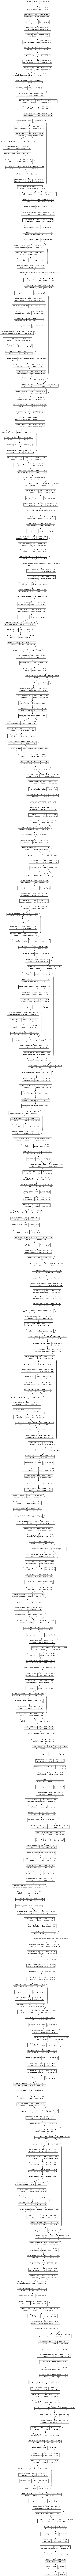

In [30]:
# Plot the Model Diagram
set_config(display="diagram")
from keras.utils.vis_utils import plot_model
plot_model(cnn_model, to_file=model_arch(model_name), show_shapes=True)

In [31]:
# Code by https://www.kaggle.com/code/gpiosenka/callback-to-continue-or-halt-training-f1-90
class ASK(keras.callbacks.Callback):
    def __init__ (self, model, epochs,  ask_epoch): # initialization of the callback
        super(ASK, self).__init__()
        self.model=model               
        self.ask_epoch=ask_epoch
        self.subask_epoch = int(ask_epoch/2)
        self.epochs=100
        self.ask=True # if True query the user on a specified epoch
        
    def on_train_begin(self, logs=None): # this runs on the beginning of training
        if self.ask_epoch == 0: 
            print('you set ask_epoch = 0, ask_epoch will be set to 1', flush=True)
            self.ask_epoch=1
        if self.ask_epoch >= self.epochs: # you are running for epochs but ask_epoch>epochs
            print('ask_epoch >= epochs, will train for ', epochs, ' epochs', flush=True)
            self.ask=False # do not query the user
        if self.epochs == 1:
            self.ask=False # running only for 1 epoch so do not query user
        else:
            print('Training will proceed until epoch', ask_epoch,' then you will be asked to') 
            print(' enter H to halt training or enter an integer for how many more epochs to run then be asked again')  
        self.start_time= time.time() # set the time at which training started
        
    def on_train_end(self, logs=None):   # runs at the end of training     
        tr_duration=time.time() - self.start_time   # determine how long the training cycle lasted         
        hours = tr_duration // 3600
        minutes = (tr_duration - (hours * 3600)) // 60
        seconds = tr_duration - ((hours * 3600) + (minutes * 60))
        msg = f'training elapsed time was {str(hours)} hours, {minutes:4.1f} minutes, {seconds:4.2f} seconds)'
        print (msg, flush=True) # print out training duration time
        
    def on_epoch_end(self, epoch, logs=None):  # method runs on the end of each epoch
        
        if self.ask: # are the conditions right to query the user?
            if epoch + 1 ==self.ask_epoch: # is this epoch the one for quering the user?
                print('\n Enter H to end training or  an integer for the number of additional epochs to run then ask again')
                ans=input()
                
                if ans == 'H' or ans =='h' or ans == '0': # quit training for these conditions
                    print ('you entered ', ans, ' Training halted on epoch ', epoch+1, ' due to user input\n', flush=True)
                    self.model.stop_training = True # halt training
                else: # user wants to continue training
                    self.ask_epoch += int(ans)
                    if self.ask_epoch > self.epochs:
                        print('\nYou earlier specified a maximum epochs of ', self.epochs, '\n, its seems that you want to train for a total of', self.ask_epoch,'\n\n Please confirm your action, please enter "Y", or "N" to end training at ', self.epochs)
                        ans=input()
                        
                        if ans == 'Y' or ans =='y':
                            self.epochs = self.ask_epoch
                        else:
                             print('\nYou specified maximum epochs of as ', self.epochs, ' cannot train for ', self.ask_epoch, flush =True)
                    else:
                        print ('you entered ', ans, ' Training will continue to epoch ', self.ask_epoch, flush=True)
                        
ask=ASK(cnn_model, epochs,  ask_epoch)

In [32]:
# starting the Checkpoint for the model
# checkpoint_dir = os.path.dirname(checkpoint_path)

check_point = tf.keras.callbacks.ModelCheckpoint(
                                          filepath=checkpoint_path(model_name),
                                          save_weights_only=True,
                                          save_best_only=True, 
                                          monitor="val_accuracy",
                                          verbose = 1,
                                        )

reduce_learning = tf.keras.callbacks.ReduceLROnPlateau(
                                            monitor="val_accuracy", 
                                            # factor=0.5, 
                                            patience=2,
                                            verbose=1
                                            )

early_stop = tf.keras.callbacks.EarlyStopping(
                                       monitor="val_accuracy", 
                                       min_delta=0.0005,
                                       patience=11, 
                                       verbose=1,
                                       restore_best_weights=True
                                       )

callbacks = [
            check_point,
            reduce_learning, 
            ask
          ]

# Define callbacks
# from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
# checkpoint_path = "models/vgg16_best_model.h5"
# callbacks = [
#     ModelCheckpoint(filepath=checkpoint_path, save_best_only=True, monitor='val_accuracy', verbose=1),
#     ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=3, verbose=1),
#     EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True, verbose=1)
# ]

In [33]:
# starting the Checkpoint for the model
e_checkpoint_path = "models/fedav_best_model.h5"
checkpoint_dir = os.path.dirname(e_checkpoint_path)

e_check_point = tf.keras.callbacks.ModelCheckpoint(
                                          filepath=e_checkpoint_path,
                                          save_weights_only=True,
                                          save_best_only=True, 
                                          monitor="val_accuracy",
                                          verbose = 1,
                                        )

e_reduce_learning = tf.keras.callbacks.ReduceLROnPlateau(
                                            monitor="val_accuracy", 
                                            # factor=0.5, 
                                            patience=2,
                                            verbose=1
                                            )

e_early_stop = tf.keras.callbacks.EarlyStopping(
                                       monitor="val_accuracy", 
                                       min_delta=0.0005,
                                       patience=11, 
                                       verbose=1,
                                       restore_best_weights=True
                                       )

e_callbacks = [
#             e_check_point,
            e_reduce_learning, 
            e_early_stop, 
            ask
          ]

In [ ]:
model_history=cnn_model.fit(
                  train_generator,  
                  steps_per_epoch=train_generator.n//train_generator.batch_size,
                  epochs=100, 
                  verbose=1,
                  callbacks=callbacks,  
                  validation_data=validation_generator,
                  validation_steps= validation_generator.n//validation_generator.batch_size,
                  )

you set ask_epoch = 0, ask_epoch will be set to 1
Training will proceed until epoch 0  then you will be asked to
 enter H to halt training or enter an integer for how many more epochs to run then be asked again
Epoch 1/100


2024-07-31 03:50:54.785063: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inEfficientNetB3/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


1262/1262 [==============================] - ETA: 0s - loss: 5.0646 - accuracy: 0.2997
Epoch 1: val_accuracy improved from -inf to 0.41696, saving model to models/fedav_best_model-EfficientNetB3.ckpt

 Enter H to end training or  an integer for the number of additional epochs to run then ask again


 60


you entered  60  Training will continue to epoch  61
1262/1262 [==============================] - 684s 494ms/step - loss: 5.0646 - accuracy: 0.2997 - val_loss: 2.1939 - val_accuracy: 0.4170 - lr: 0.0010
Epoch 2/100
1262/1262 [==============================] - ETA: 0s - loss: 1.7878 - accuracy: 0.4578
Epoch 2: val_accuracy improved from 0.41696 to 0.51885, saving model to models/fedav_best_model-EfficientNetB3.ckpt
1262/1262 [==============================] - 106s 84ms/step - loss: 1.7878 - accuracy: 0.4578 - val_loss: 1.4901 - val_accuracy: 0.5188 - lr: 0.0010
Epoch 3/100
1262/1262 [==============================] - ETA: 0s - loss: 1.4840 - accuracy: 0.5267
Epoch 3: val_accuracy improved from 0.51885 to 0.56806, saving model to models/fedav_best_model-EfficientNetB3.ckpt
1262/1262 [==============================] - 108s 86ms/step - loss: 1.4840 - accuracy: 0.5267 - val_loss: 1.3359 - val_accuracy: 0.5681 - lr: 0.0010
Epoch 4/100
1262/1262 [==============================] - ETA: 0s - lo

In [ ]:
from pylab import rcParams
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
start_epoch = 0
Epoch_count=len(acc)+ start_epoch
Epochs=[]
for i in range (start_epoch ,Epoch_count):
    Epochs.append(i+1)   
index_loss=npy.argmin(val_loss)   #   this is the epoch with the lowest validation loss
val_lowest=val_loss[index_loss]
index_acc=npy.argmax(val_acc)


# summarize history for accuracy using reLU
sns.set()
plt.figure(figsize=(10, 5))
plt.subplot(2, 2, 1)
plt.plot(acc)
plt.plot(val_acc)
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')



# summarize history for loss using reLU
plt.subplot(2, 2, 2)
plt.plot(loss)
plt.plot(val_loss)
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


In [ ]:
# Code by https://www.kaggle.com/code/gpiosenka/callback-to-continue-or-halt-training-f1-90
def trainValPlot(tr_data, start_epoch):
    # Plot the training and validation data
    tacc=tr_data.history['accuracy']
    tloss=tr_data.history['loss']
    vacc=tr_data.history['val_accuracy']
    vloss=tr_data.history['val_loss']
    Epoch_count=len(tacc)+ start_epoch
    Epochs=[]
    for i in range (start_epoch ,Epoch_count):
        Epochs.append(i+1)   
    index_loss=npy.argmin(vloss)   #   this is the epoch with the lowest validation loss
    val_lowest=vloss[index_loss]
    index_acc=npy.argmax(vacc)
    acc_highest=vacc[index_acc]
    plt.style.use('fivethirtyeight')
    sc_label='best epoch= '+ str(index_loss+1 +start_epoch)
    vc_label='best epoch= '+ str(index_acc + 1+ start_epoch)
    fig,axes=plt.subplots(nrows=1, ncols=2, figsize=(10,5))
    sns.set()
    axes[0].plot (Epochs,tacc,'r',label= 'Training Accuracy')
    axes[0].plot (Epochs,vacc,'g',label= 'Validation Accuracy')
    axes[0].scatter(index_acc+1 +start_epoch,acc_highest, s=150, c= 'blue', label=vc_label)
    axes[0].set_title('Training and Validation Accuracy', fontsize=35)
    axes[0].set_xlabel('Epochs', fontsize=25)
    axes[0].set_ylabel('Accuracy', fontsize=25)
    axes[0].legend()
    axes[1].plot(Epochs,tloss, 'r', label='Training loss')
    axes[1].plot(Epochs,vloss,'g',label='Validation loss' )
    axes[1].scatter(index_loss+1 +start_epoch,val_lowest, s=150, c= 'blue', label=sc_label)
    axes[1].set_title('Training and Validation Loss', fontsize=35)
    axes[1].set_xlabel('Epochs', fontsize=25)
    axes[1].set_ylabel('Loss', fontsize=25)
    axes[1].legend()
    plt.tight_layout    
    plt.show()
    
trainValPlot(model_history,0)


In [ ]:
model = cnn_model

# Evaluate the model
loss, acc = model.evaluate(train_generator, verbose=2)

In [ ]:
model = cnn_model

# Evaluate the model
loss, acc = model.evaluate(validation_generator, verbose=2)

In [ ]:
# Loads the weights
cnn_model.load_weights(checkpoint_path(model_name=model_name))

# Re-evaluate the model
loss, acc = cnn_model.evaluate(validation_generator, verbose=2)
print("Restored model, validation accuracy: {:5.2f}%".format(100 * acc))

In [ ]:
# Loads the weights
cnn_model.load_weights(checkpoint_path(model_name))

# Re-evaluate the model
loss, acc = cnn_model.evaluate(test_images, test_labels, verbose=2)
print("Restored model, accuracy on New Test data: {:5.2f}%".format(100 * acc))

In [ ]:
# 
def ModelPredictionOnTestDataset(test_generator=test_generator):
#     test_steps= test_generator.n//test_generator.batch_size
    y_pred= []
    y_label=test_generator.labels
    classes=list(train_generator.class_indices.keys())
    class_count=len(classes)
    wrong_predictions=0
    
    # predict on the test set
    preds=cnn_model.predict(test_generator, test_steps, verbose=1) 
    
    total_predictions=len(preds)
    print(f'total prediction: {total_predictions}')
    for i, p in enumerate(preds):
            pred_index=npy.argmax(p)  
            # labels are integer values       
            true_index=test_generator.labels[i]  
            if pred_index != true_index:       
                # a misclassification has occurred                                     
                wrong_predictions=wrong_predictions + 1
            y_pred.append(pred_index)
    acc=( 1-wrong_predictions/total_predictions) * 100
    print(f'\n{wrong_predictions} out of {total_predictions} tested images could not be detected properly.\nAccuracy of {acc:6.2f}\n')
    ypred=npy.array(y_pred)
    ytrue=npy.array(y_label)
    if class_count <=30:
        cm = confusion_matrix(ytrue, ypred )
        # plot the confusion matrix
        plt.figure(figsize=(8, 4))
        sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)       
        plt.xticks(npy.arange(class_count)+.5, classes, rotation=90)
        plt.yticks(npy.arange(class_count)+.5, classes, rotation=0)
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix on Validation Data", fontsize=40)
        plt.show()
    clr = classification_report(y_label, y_pred, target_names=classes, digits= 5) # create classification report
    print("Classification Report on Validation Data:\n-------------------------------------\n", clr)

#     # Plot the confusion matrix
#         ConfusionMatrix(
#                         label_test=ytrue, 
#                         label_prep=ypred, 
#                         class_count=class_count, 
#                         class_keys=class_keys, 
#                         heada=' for Entire Test Set'
#                         )
        
    return wrong_predictions, total_predictions



In [ ]:
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adamax
from keras_tuner import Hyperband

def build_model(hp):
    model_name = hp.Choice('model_name', ['EfficientNetB3', 'VGG16', 'ResNet50'])
    
    if model_name 'EfficientNetB3':
        base_model = tf.keras.applications.EfficientNetB3(
            include_top=False, 
            weights="imagenet",
            input_shape=(224, 224, 3), 
            pooling='max'
        )
    elif model_name == 'VGG16':
        base_model = tf.keras.applications.VGG16(
            include_top=False, 
            weights="imagenet",
            input_shape=(224, 224, 3), 
            pooling='max'
        )
    else:
        base_model = tf.keras.applications.ResNet50(
            include_top=False, 
            weights="imagenet",
            input_shape=(224, 224, 3), 
            pooling='max'
        )
    
    base_model.trainable = True
    x = base_model.output
    
    # Add BatchNormalization layer
    x = BatchNormalization(
        axis=-1, 
        momentum=0.99, 
        epsilon=0.001,
        name='batch_norm_x' 
    )(x)
    
    # Add Dense layer
    x = Dense(
        units=hp.Int('dense_units', min_value=128, max_value=512, step=64), 
        kernel_regularizer=regularizers.l2(hp.Float('l2_reg', min_value=0.01, max_value=0.05, step=0.01)),
        activity_regularizer=regularizers.l1(hp.Float('l1_act_reg', min_value=0.005, max_value=0.02, step=0.005)),
        bias_regularizer=regularizers.l1(hp.Float('l1_bias_reg', min_value=0.005, max_value=0.02, step=0.005)),
        activation='relu',
        name='dense_x'
    )(x)
    
    # Add Dropout layer
    x = Dropout(
        rate=hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1), 
        seed=123,
        name='dropout_x'
    )(x) 
    
    # Add output layer
    output = Dense(
        units=7,  # Adjust based on your number of classes
        activation='softmax',
        name='dense_output'
    )(x)
    
    cnn_model = Model(inputs=base_model.input, outputs=output, name=model_name)
    
    cnn_model.compile(
        optimizer=Adamax(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')), 
        loss='categorical_crossentropy', 
        metrics=['accuracy']
    )
    
    return cnn_model

tuner = Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=10,
    factor=3,
    hyperband_iterations=1,
    directory='hyperband_dir',
    project_name='hyperband_cnn_tuning'
)

(x_train, y_train), (x_val, y_val) = tf.keras.datasets.cifar10.load_data()  # Replace with your dataset
y_train = tf.keras.utils.to_categorical(y_train, 7)  # Adjust number of classes
y_val = tf.keras.utils.to_categorical(y_val, 7)  # Adjust number of classes

x_train = tf.image.resize(x_train, (224, 224))
x_val = tf.image.resize(x_val, (224, 224))

tuner.search(x_train, y_train, validation_data=(x_val, y_val), epochs=10)

best_model = tuner.get_best_models(num_models=1)[0]
best_model.summary()

In [ ]:
# Validation
wrong_predictions, total_predictions = ModelPredictionOnTestDataset(validation_generator)

In [ ]:
# Test Set 
ModelPredictionOnTestDataset()

In [ ]:
# 
test_images, test_labels = next(test_generator)
preds = cnn_model.predict(test_images)
# One hot conversion
label_prep = npy.argmax(preds, axis = 1)
label_test = npy.argmax(test_labels, axis = 1)
# Reshape
label_prep = label_prep.reshape((-1, 1))
label_test = npy.reshape(label_test, (len(label_test), 1))

print('correct prediction:', npy.sum((label_test == label_prep)*1)/test_batch_size,'\n')


def compare(label_prep, gen=train_generator):
    class_dictionary = gen.class_indices
    for key, value in class_dictionary.items():
        if value == label_prep:
             return key

def dif(label_test, label_prep, gen=train_generator):    
    class_dictionary = gen.class_indices
    test = ''
    id = ''
    for key, value in class_dictionary.items():
        if value == label_test:
            test = key
        if value == label_prep:
            id = key
    return test, id

#Code by Hitesh Kumar https://www.kaggle.com/hitzz97/emotion-detection

fig = plt.figure(figsize=((20, 30)))

# k = 0
for j in range(len(label_prep)):
    ax = plt.subplot(7, 5, j+1)
    px = test_images[j]/255
#     k += 1
    ax.imshow(px)
    ax.set_xticks([])
    ax.set_yticks([])
    
    if label_test[j] == label_prep[j]:
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(15)
            ax.spines[axis].set_color('green')
        ax.set_title(
                    compare(label_prep[j]),
                    color='green', 
                    fontsize=35
                     )

    else:
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(15)
            ax.spines[axis].set_color('red')
        ax.set_title(
                    'Pred:'+dif(label_test[j], label_prep[j])[1]+" | Act:"+ dif(label_test[j], label_prep[j])[0],
                    color='red', 
                    fontsize=35
                    )
    plt.tight_layout()

In [ ]:
test_images, test_labels = next(test_generator_shuffled)
preds = cnn_model.predict(test_images)
# print(preds)
idx = npy.argmax(preds, axis = 1)
# test_labels = test_labels.astype(int)
test_labels = npy.argmax(test_labels, axis = 1)
idx = idx.reshape((-1, 1))
test_labels = npy.reshape(test_labels, (len(test_labels), 1))
# print()
print('correct prediction:', npy.sum((test_labels == idx)*1)/test_batch_size)


def compare(idx, train_generator):
    class_dictionary = train_generator.class_indices
    for key, value in class_dictionary.items():
        if value == idx:
             return key

def dif(test_labels, idx, train_generator):    
    class_dictionary = train_generator.class_indices
    test = ''
    id = ''
    for key, value in class_dictionary.items():
        if value == test_labels:
            test = key
        if value == idx:
            id = key
    return test, id


#Code by Hitesh Kumar https://www.kaggle.com/hitzz97/emotion-detection

fig = plt.figure(figsize=((20, 30)))

# k = 0
for j in range(len(idx)):
    ax = plt.subplot(7, 5, j+1)
    px = test_images[j]/255
#     k += 1
    ax.imshow(px)
    ax.set_xticks([])
    ax.set_yticks([])
    
#     print(idx[j])
#     print(test_labels[j])
    if test_labels[j] == idx[j]:
#     if  class_dictionary[test_labels[j]] == class_dictionary[idx[j]]:
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(15)
            ax.spines[axis].set_color('green')
        ax.set_title(
                    compare(idx[j], train_generator),
                    color='green', 
                    fontsize=40
                     )

    else:
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(15)
            ax.spines[axis].set_color('red')
        ax.set_title(
                    'Pred:'+dif(test_labels[j], idx[j], train_generator)[1]+" | Act:"+ dif(test_labels[j], idx[j], train_generator)[0],
                    color='red', 
                    fontsize=40
                    )
    plt.tight_layout()